# 🕴️Title and Executive Summary 

## Twitch Streamers Analysis

We are data analysts at Twitch, the biggest live-video streaming platform for video games in the US. With that, you know you have data of more than 31 million viewers daily such as, who they are watching, how long they are watching, who they follow, etc. Your boss tells you, they want to learn more about the audiences that engage with the biggest streamers who are on their site, and who is watching them.

> Your boss asks you to find out a few things about the TOP 1000 streamers on the platform. 

- How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

- What is the spread of Average viewers across the Top 1000 streams? (Histogram)

- Is there relationship between watch time and stream time? (Relationship Comparison)

- How does average viewership change by language, and then by partnership status? (Multipanel figure)

- Which languages dominate the Top 1000 streams? (Bar chart)



## Data Card

Title: Top 1000 Streamers from 2020

Source with a link: 
From the Website Kaggle, presented by Aayush Mishra 
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

The data set has the following fields: 
1. Channel : Name of Channel
2. Watch time (minutes)
3. Stream time (minutes) 
4. Peak viewers : Highest number of viewers they had at one moment 
5. Average Viewers : Average viewers every stream
6. Followers : Number of total followers
7. Followers gained 
8. Views gained 
9. Partnered (With Twitch) 
10. Mature : Classified as over 18 content 
11. Language : Language the stream is in. 

License: 
CC0: Public Domain

## Loading and File IO

In [3]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  import plotly.express as px
  import plotly.graph_objects as go
  PLOTLY_AVAILABLE = True
except ImportError:
  PLOTLY_AVAILABLE = False
  print("Note: Plotly not available. Interactive visualizations will be skipped.")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:
df = pd.read_csv("data/twitchdata-update.csv")

# converting to pandas dataframe function path: is asking for what type the input will be
def load_csv(path: str) -> pd.DataFrame:
  try:
    # Try to turn the CSV into pandas dataframe and if successful save it as DF.
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path}. check data/ folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path}. check delimiter or bad rows.") from e
  else:
    return df

In [ ]:
display(df.head())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Followers_Millions
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,3.246298
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,5.310163
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,1.767635
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,3.944850
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,8.938903


# Simplified Exploratory Data Analysis (EDA)

### How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

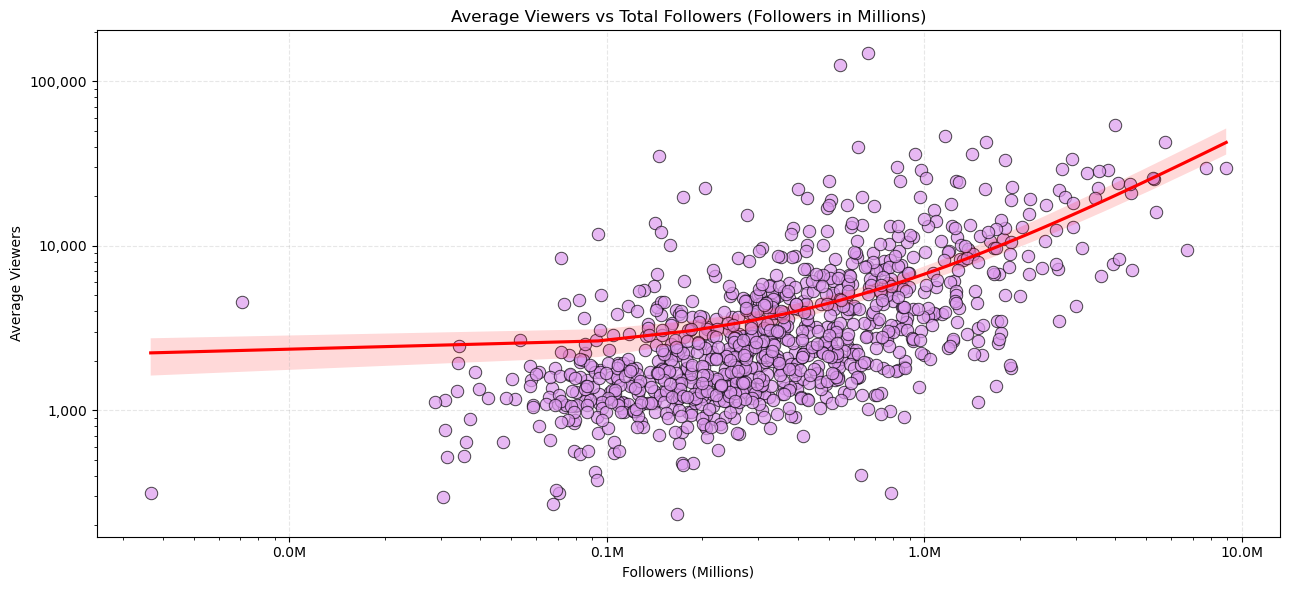

In [ ]:
# How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

import matplotlib.ticker as ticker  # Changes Labels to be more readable

# Stores Average Viewers in the dataframe into a variable
AvgView = df["Average viewers"]

NumFollow = df["Followers"]

df["Followers_Millions"] = df["Followers"] / \
    1_000_000  #Followers are divided into millions

fig, ax = plt.subplots(figsize=(13, 6))  #Sets size

sns.scatterplot(  #Creates the scatterplot
    data=df,
    x="Followers_Millions",
    y="Average viewers",
    color="#DD9AEE",
    edgecolor="black",
    alpha=0.7,
    s=80
)

sns.regplot(
    data=df,
    x="Followers_Millions",
    y="Average viewers",
    scatter=False,
    color="red",
    ax=ax
)

ax.set_xscale('log')  #Both spread out large numbers
ax.set_yscale('log')


ax.xaxis.set_major_formatter(
    #Both give clear numbers rather than numbers with base 10 and exponents.
    ticker.FuncFormatter(lambda x, pos: f"{x:.1f}M")
)
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f"{int(y):,}")
)

plt.title("Average Viewers vs Total Followers (Followers in Millions)")
plt.xlabel("Followers (Millions)")
plt.ylabel("Average Viewers")
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

### Distribution Characterization of a Key Outcome

In [152]:
from scipy.stats import skew

outcome = df["Average viewers"]
summary = pd.DataFrame({
    "Mean": [outcome.mean()],
    "Median": [outcome.median()],
    "Std Dev": [outcome.std()],
    "Skewness": [skew(outcome)],
    "Outliers (>99th percentile)": [(outcome > outcome.quantile(0.99)).sum()]
})
summary

,Mean,Median,Std Dev,Skewness,Outliers (>99th percentile)
0,4781.04,2425.0,8453.684965,9.05298,10


### Interactive plot

In [ ]:
fig = px.scatter(
    df,
    x="Followers",
    y="Average viewers",
    color="Language",
    hover_name="Channel",
    size="Average viewers",
    log_x=True,
    log_y=True,
    title="Average Viewers vs Followers"
)
fig.show()

### Correlation Between Two Numeric Variables

Pearson r = 0.4283032249654135 p = 7.074502598361057e-46


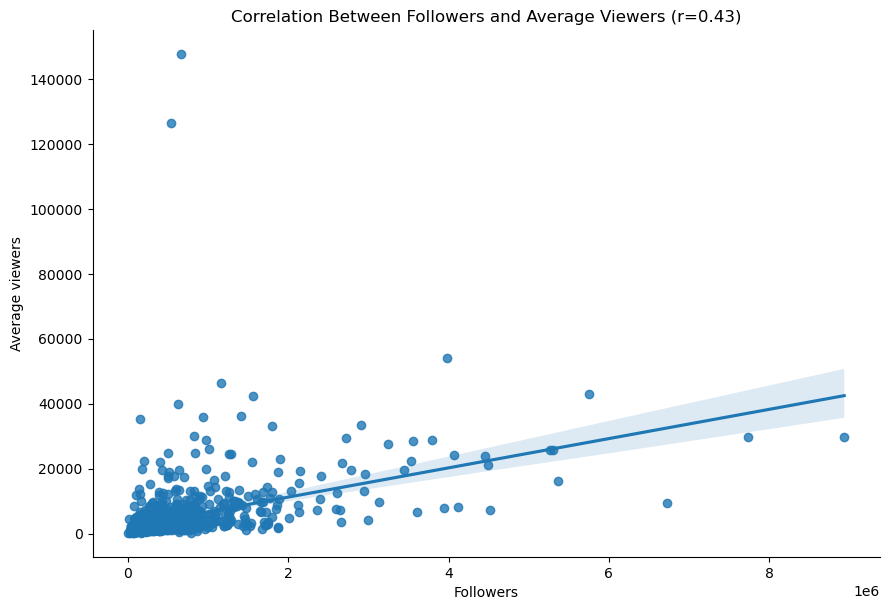

In [172]:
from scipy.stats import pearsonr

y = df["Followers"]
x = df["Average viewers"]

r, p = pearsonr(x, y)
print("Pearson r =", r, "p =", p)

sns.lmplot(data=df, x="Followers", y="Average viewers", height=6, aspect=1.5)
plt.title(f"Correlation Between Followers and Average Viewers (r={r:.2f})")
plt.show()

### What is the spread of Average Viewers across the Top 1000 streams? (Histogram)

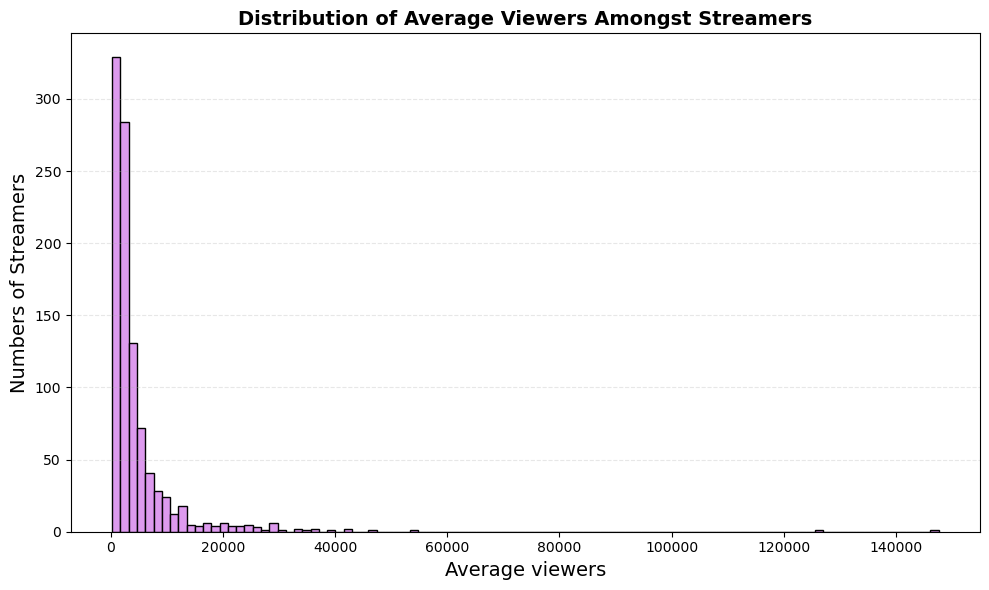

In [ ]:
Avgview = df["Average viewers"] 

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Avgview, bins=100, color="#DD9AEE", edgecolor='black')

plt.title('Distribution of Average Viewers Amongst Streamers',
          fontsize=14, fontweight='bold')
plt.xlabel('Average viewers', fontsize=14)
plt.ylabel('Numbers of Streamers', fontsize=14)
ax.grid(True, alpha=0.3, axis='y',  linestyle='--')

plt.tight_layout()
plt.show()

### Is there a relationship between Stream time and Watchtime? (Relationship comparison)

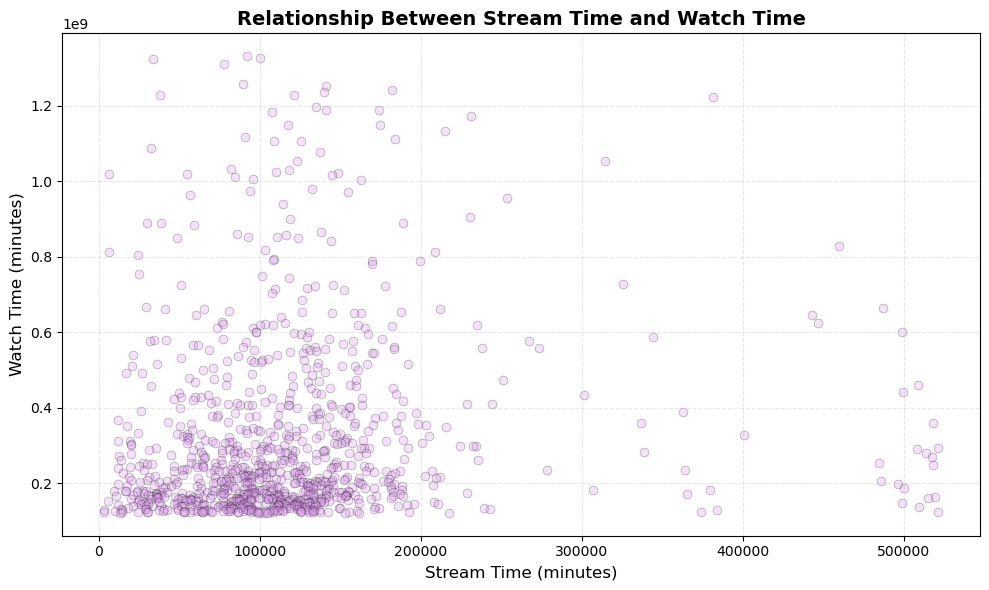

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out top 2% of watch time to reduce clutter
threshold = df["Watch time(Minutes)"].quantile(0.95)
filtered = df[df["Watch time(Minutes)"] <= threshold]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filtered,
    x="Stream time(minutes)",
    y="Watch time(Minutes)",
    color="#DD9AEE",
    edgecolor="black",
    alpha=0.3,   # transparency
    s=40         # smaller points
)

plt.title("Relationship Between Stream Time and Watch Time", fontsize=14, fontweight="bold")
plt.xlabel("Stream Time (minutes)", fontsize=12)
plt.ylabel("Watch Time (minutes)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### How does average viewership change by language, and then by partnership status? (Multipanel figure)

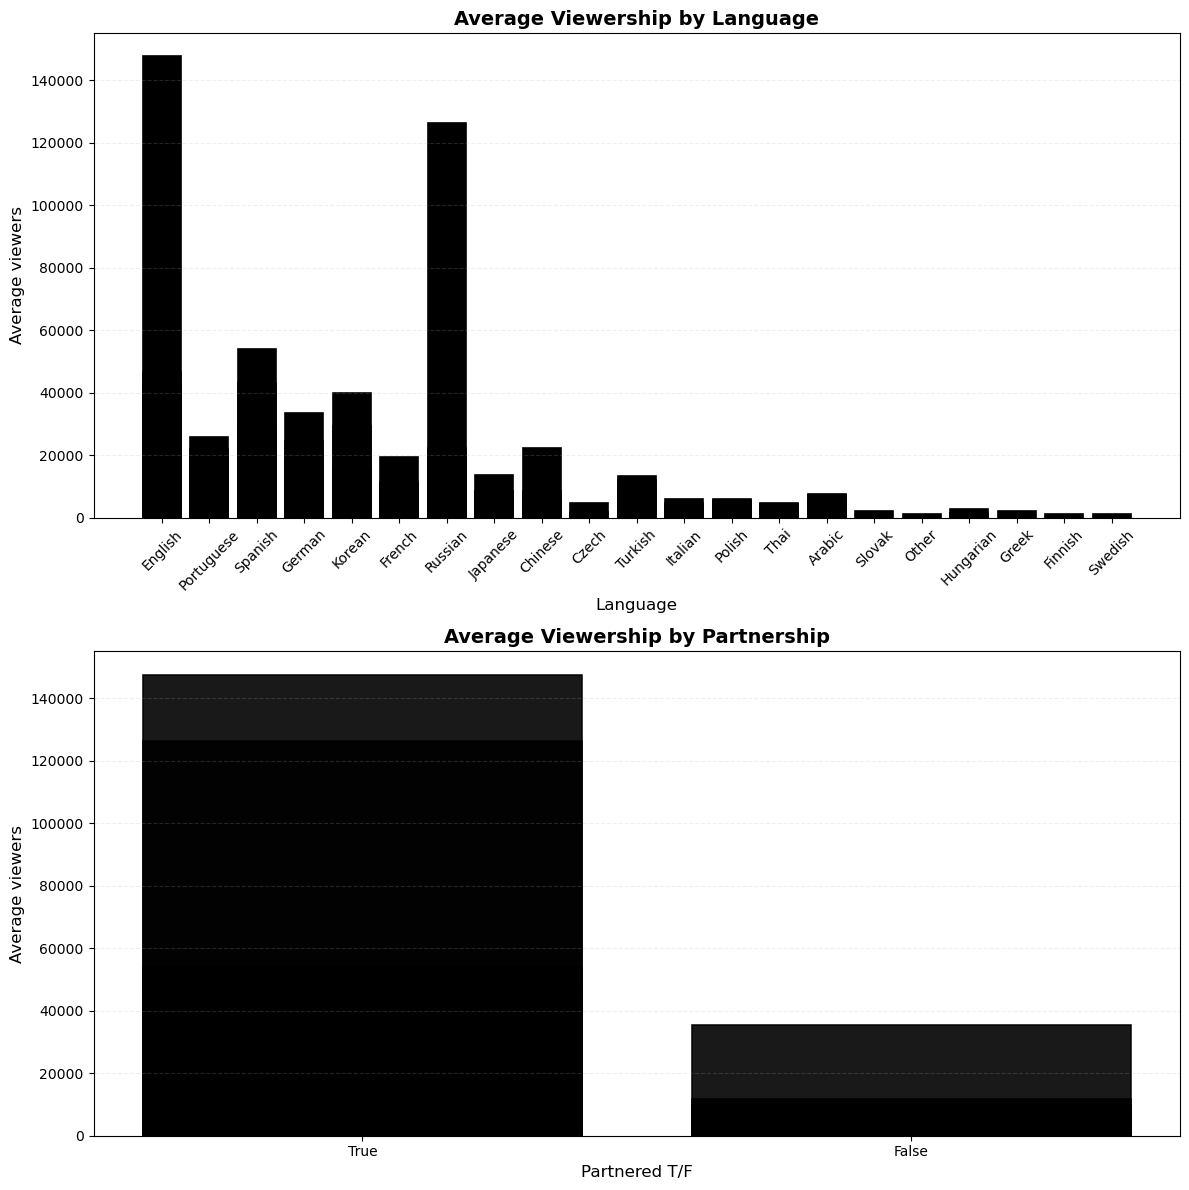

In [ ]:
# Aggregate average viewers by partnership

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

#First Plot
ax = axes[0]
ax.bar(df['Language'], df['Average viewers'],
       color="black", alpha=1.0, edgecolor='black', linewidth=1.2)

ax.grid(linestyle='--', alpha=0.2, axis='y')
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Average viewers', fontsize=12)
ax.set_title('Average Viewership by Language', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)


#Second plot
ax = axes[1]

partner_str = df['Partnered'].astype(str)

ax.bar(partner_str, df['Average viewers'],
       color="black", alpha=0.9, edgecolor='black', linewidth=1.2)

ax.grid(linestyle='--', alpha=0.2, axis='y')
ax.set_xlabel('Partnered T/F', fontsize=12)
ax.set_ylabel('Average viewers', fontsize=12)
ax.set_title('Average Viewership by Partnership', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()


### Association Between Two Categorical Variables

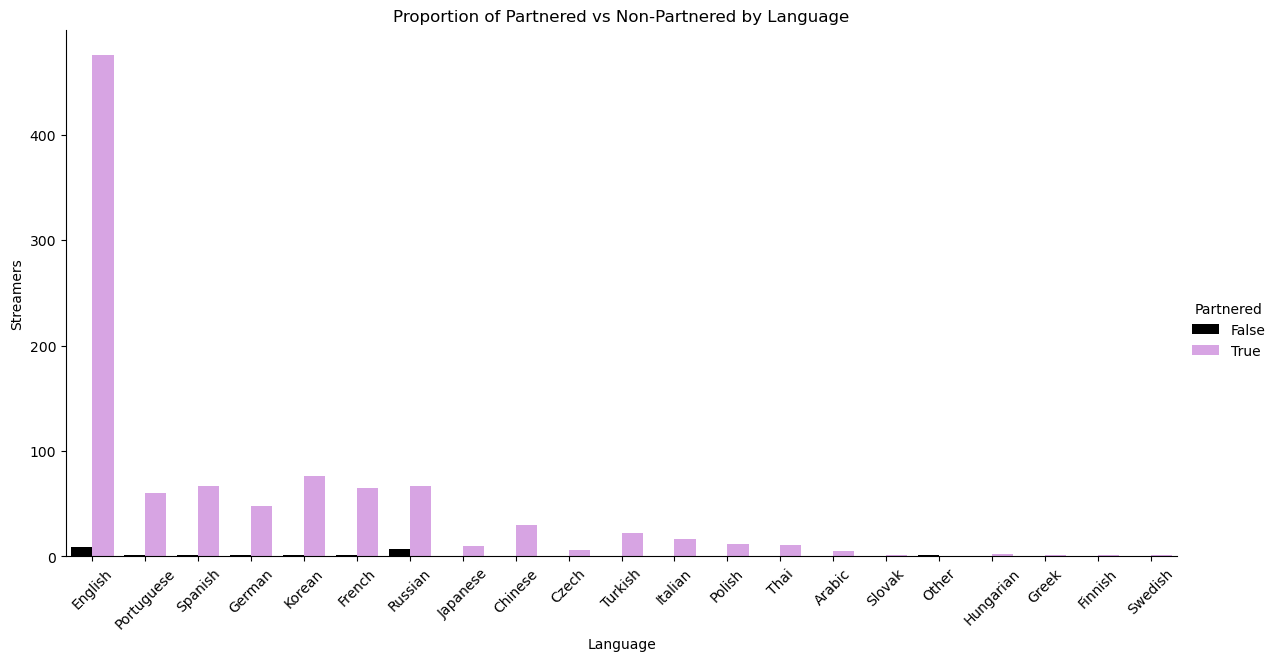

In [169]:
g = sns.catplot(
    data=df, x="Language", hue="Partnered", kind="count",
    height=6, aspect=2, palette=["black", "#DD9AEE"]
)

g.set_xticklabels(rotation=45)
g.set_ylabels("Streamers")

plt.title("Proportion of Partnered vs Non-Partnered by Language")
plt.show()

### Which languages dominate the Top 1000 streams? (Bar chart)

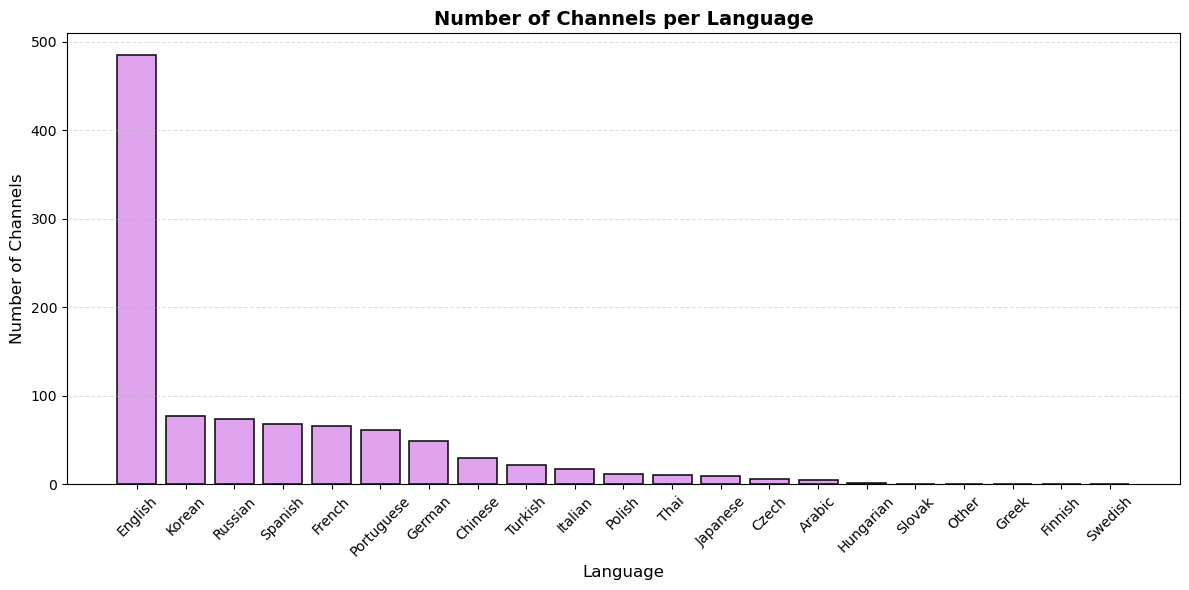

In [ ]:
#Categorizes the languages by amount of how often they show up.
lang_counts = df['Language'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(lang_counts.index, lang_counts.values, color="#DD9AEE",
       alpha=0.9, edgecolor='black', linewidth=1.2)

ax.grid(linestyle='--', alpha=0.4, axis='y')

ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Number of Channels', fontsize=12)
ax.set_title('Number of Channels per Language', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)  #Rotate labels so they don’t overlap
plt.tight_layout()
plt.show()

In [177]:
from scipy.stats import ttest_ind

group1 = df[df["Partnered"]==True]["Average viewers"].dropna()
group2 = df[df["Partnered"]==False]["Average viewers"].dropna()

t, p = ttest_ind(group1, group2, equal_var=False)

#Cohen’s d
cohen_d = (group1.mean() - group2.mean()) / np.sqrt(((group1.std()**2 + group2.std()**2)/2))

print("Welch’s t-test: t =", t, "p =", p)
print("Cohen’s d =", cohen_d)

#95% CI for mean difference
import scipy.stats as stats
difference = group1.mean() - group2.mean()
l = np.sqrt(group1.var()/len(group1) + group2.var()/len(group2))
ci_low, ci_high = stats.t.interval(0.95, df=len(group1)+len(group2)-2, loc=difference, scale=l)
print("95% CI for mean difference:", ci_low, "to", ci_high)

Welch’s t-test: t = -0.32106141619213424 p = 0.7511614306175836
Cohen’s d = -0.06483141998265386
95% CI for mean difference: -3680.020476344754 to 2645.151541598519


## Appendix

https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

https://www.learnpython.org/

https://www.geeksforgeeks.org/data-analysis/data-analysis-with-python/

https://www.geeksforgeeks.org/python/scipy-stats/

https://www.geeksforgeeks.org/data-science/data-visualization-different-charts-python/

https://www.geeksforgeeks.org/blogs/python-libraries-for-data-analytics/